In [5]:
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
file='2937-1-0-0.wav'

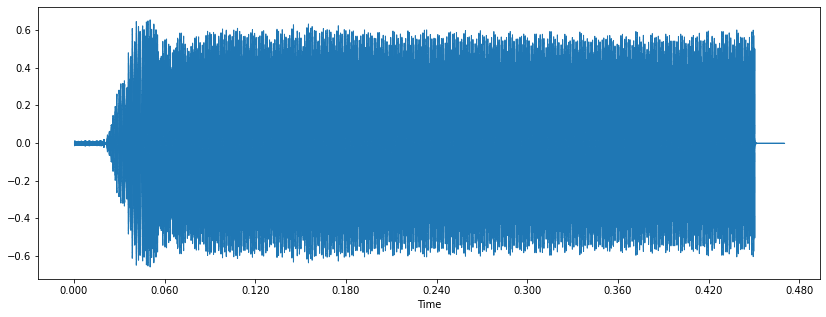

In [10]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(file)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(file)

In [11]:
sample_rate

22050

In [12]:
data

array([ 6.2538888e-03,  1.2421724e-02,  1.1012078e-02, ...,
        5.4277302e-06, -7.7681570e-06,  0.0000000e+00], dtype=float32)

In [13]:
df=pd.read_csv('UrbanSound8K.csv')
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [14]:
df.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [16]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [18]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
mfccs.shape

(40, 21)

In [19]:
mfccs

array([[-3.61694336e+02, -1.60640579e+02, -6.50641708e+01,
        -5.47020912e+01, -7.10335312e+01, -7.55323639e+01,
        -7.02403259e+01, -6.58468628e+01, -7.34369125e+01,
        -8.08814087e+01, -7.61166992e+01, -7.89877548e+01,
        -8.28871994e+01, -8.32444916e+01, -8.42491226e+01,
        -8.60283737e+01, -7.96446991e+01, -7.79846573e+01,
        -7.02580185e+01, -4.51984444e+01, -9.03163147e+01],
       [ 1.36479431e+02,  1.15760406e+02,  9.75423279e+01,
         8.57183609e+01,  7.33607178e+01,  7.16495895e+01,
         7.04952316e+01,  6.92146149e+01,  6.82234192e+01,
         6.75413818e+01,  7.00740280e+01,  6.73444519e+01,
         6.54819489e+01,  6.55968781e+01,  6.57952881e+01,
         6.76076279e+01,  7.04459229e+01,  6.88311462e+01,
         7.43092651e+01,  8.48826599e+01,  8.85122681e+01],
       [ 2.29337730e+01, -2.61357746e+01, -3.51068344e+01,
        -3.61775589e+01, -3.54991150e+01, -3.25068855e+01,
        -3.12178726e+01, -3.37175331e+01, -3.33564377e

In [21]:
audio_path=r'C:\Users\Gowtham\Desktop\audio'

In [30]:
def feature_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [32]:
import os
extracted_features=[]
for index_nuum,row in tqdm(df.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [04:00, 13.75it/s]C:\Users\Gowtham\Anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [10:28, 19.39it/s]C:\Users\Gowtham\Anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8328it [10:28, 22.11it/s]C:\Users\Gowtham\Anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [10:54, 13.34it/s]


In [33]:
new_df=pd.DataFrame(extracted_features,columns=['feature','class'])
new_df

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing
...,...,...
8727,"[-398.5845, 135.53496, -50.725018, 35.855907, ...",car_horn
8728,"[-346.4742, 86.34815, -45.16858, 51.709873, -3...",car_horn
8729,"[-303.88824, 111.35945, -45.941566, 35.877018,...",car_horn
8730,"[-344.11008, 125.45021, -54.903442, 34.891155,...",car_horn


In [34]:
x=np.array(new_df['feature'].tolist())
y=np.array(new_df['class'].tolist())

In [35]:
x.shape

(8732, 40)

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=tf.keras.utils.to_categorical(encoder.fit_transform(y))

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6985, 40), (1747, 40), (6985, 10), (1747, 10))

In [55]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
num_labels=y.shape[1]

In [58]:
model=Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [60]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=100
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='audio_path',verbose=1,save_best_only=True)
start=datetime.now()
model.fit(x_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(x_test,y_test),callbacks=[checkpointer])

duration=datetime.now()-start
print("training completed in time:",duration)

Epoch 1/100
206/219 [===========================>..] - ETA: 0s - loss: 0.9676 - accuracy: 0.6799
Epoch 00001: val_loss improved from inf to 0.76433, saving model to audio_path
INFO:tensorflow:Assets written to: audio_path\assets
219/219 [==============================] - 7s 31ms/step - loss: 0.9682 - accuracy: 0.6796 - val_loss: 0.7643 - val_accuracy: 0.7464
Epoch 2/100
217/219 [============================>.] - ETA: 0s - loss: 0.9705 - accuracy: 0.6730
Epoch 00002: val_loss did not improve from 0.76433
219/219 [==============================] - 1s 5ms/step - loss: 0.9702 - accuracy: 0.6733 - val_loss: 0.7706 - val_accuracy: 0.7567
Epoch 3/100
218/219 [============================>.] - ETA: 0s - loss: 0.9794 - accuracy: 0.6723
Epoch 00003: val_loss did not improve from 0.76433
219/219 [==============================] - 1s 4ms/step - loss: 0.9796 - accuracy: 0.6723 - val_loss: 0.7812 - val_accuracy: 0.7510
Epoch 4/100
213/219 [============================>.] - ETA: 0s - loss: 0.9928 - a

219/219 [==============================] - 1s 4ms/step - loss: 0.9244 - accuracy: 0.6889 - val_loss: 0.7343 - val_accuracy: 0.7728
Epoch 29/100
214/219 [============================>.] - ETA: 0s - loss: 0.9291 - accuracy: 0.6989
Epoch 00029: val_loss did not improve from 0.73289
219/219 [==============================] - 1s 6ms/step - loss: 0.9266 - accuracy: 0.6988 - val_loss: 0.7451 - val_accuracy: 0.7642
Epoch 30/100
211/219 [===========================>..] - ETA: 0s - loss: 0.9376 - accuracy: 0.6872
Epoch 00030: val_loss improved from 0.73289 to 0.73205, saving model to audio_path
INFO:tensorflow:Assets written to: audio_path\assets
219/219 [==============================] - 7s 32ms/step - loss: 0.9374 - accuracy: 0.6882 - val_loss: 0.7321 - val_accuracy: 0.7750
Epoch 31/100
209/219 [===========================>..] - ETA: 0s - loss: 0.9227 - accuracy: 0.6909
Epoch 00031: val_loss did not improve from 0.73205
219/219 [==============================] - 1s 5ms/step - loss: 0.9241 - ac

Epoch 56/100
214/219 [============================>.] - ETA: 0s - loss: 0.8917 - accuracy: 0.7040
Epoch 00056: val_loss improved from 0.71032 to 0.71020, saving model to audio_path
INFO:tensorflow:Assets written to: audio_path\assets
219/219 [==============================] - 6s 28ms/step - loss: 0.8963 - accuracy: 0.7025 - val_loss: 0.7102 - val_accuracy: 0.7790
Epoch 57/100
211/219 [===========================>..] - ETA: 0s - loss: 0.8927 - accuracy: 0.6979
Epoch 00057: val_loss improved from 0.71020 to 0.70396, saving model to audio_path
INFO:tensorflow:Assets written to: audio_path\assets
219/219 [==============================] - 7s 31ms/step - loss: 0.8951 - accuracy: 0.6971 - val_loss: 0.7040 - val_accuracy: 0.7722
Epoch 58/100
218/219 [============================>.] - ETA: 0s - loss: 0.9145 - accuracy: 0.6935
Epoch 00058: val_loss did not improve from 0.70396
219/219 [==============================] - 1s 5ms/step - loss: 0.9142 - accuracy: 0.6935 - val_loss: 0.7182 - val_accur

In [64]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.7853463292121887
